# Домашняя работа номер 1

### Выполнил: Стрельцов Илья Дмитриевич Б9122-01.03.02мкт

Импортирую библиотеки

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset


Скачиваю и распаковываю датасет по стоимости домов.

In [2]:
house_price_dataset = load_dataset("animonte/train_house_price")
data = house_price_dataset['train'].to_pandas()

Посмотрим на данные (моя ide позволяет просматривать статистику на этом этапе).

In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


Я выбрал данные и с этого момента буду описывать их

In [4]:
print(data[['LotFrontage', 'LotArea']].head())
print(data[['LotFrontage', 'LotArea']].info())
print(data[['LotFrontage', 'LotArea']].describe())

   LotFrontage  LotArea
0         65.0     8450
1         80.0     9600
2         68.0    11250
3         60.0     9550
4         84.0    14260
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   LotArea      1460 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None
       LotFrontage        LotArea
count  1201.000000    1460.000000
mean     70.049958   10516.828082
std      24.284752    9981.264932
min      21.000000    1300.000000
25%      59.000000    7553.500000
50%      69.000000    9478.500000
75%      80.000000   11601.500000
max     313.000000  215245.000000


Обратим внимание на LotArea. Среднее - 9981, минимальное 1300, максимальное - 215245 (подозрительно большое, предположительно выброс). По аналогичному принципу был выбран параметр LotFrontage. Будем работать с выбросами в этих столбцах, но сначала визуализируем выбросы.

Попробуем визуализировать выбросы при помощи ящика с усами

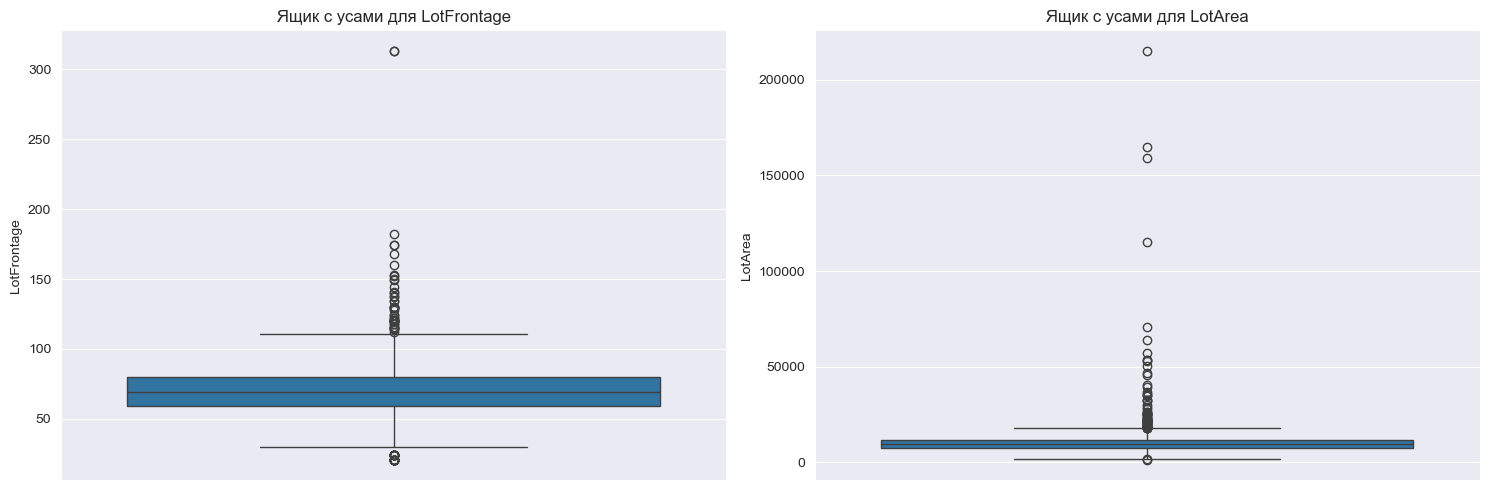

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot для LotFrontage
sns.boxplot(y=data['LotFrontage'], ax=axes[0])
axes[0].set_title('Ящик с усами для LotFrontage')

# Boxplot для LotArea
sns.boxplot(y=data['LotArea'], ax=axes[1])
axes[1].set_title('Ящик с усами для LotArea')

plt.tight_layout()
plt.show()

Как мы можем заметить и слева и справа есть аномально большие значения, а так же большое количество более сконцетрированных выбросов близко к верхней границе ящиков.

Рассчитаем выбросы через межквартильный размах (Interquartile Range, IQR).

In [17]:
def iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    normal_values = series[(series >= lower_bound) & (series <= upper_bound)]
    return normal_values, outliers, lower_bound, upper_bound

# Применяем к LotFrontage
normal_frontage, outliers_frontage, lower_frontage, upper_frontage = iqr(data['LotFrontage'])
print(f"Выбросы в LotFrontage: {len(outliers_frontage)}")
print(f"Нормальные наблюдения: {len(normal_frontage)}")
print(f"Границы для LotFrontage: [{lower_frontage:.2f}, {upper_frontage:.2f}]")

# Применяем к LotArea
normal_area, outliers_area, lower_area, upper_area = iqr(data['LotArea'])
print(f"Выбросы в LotArea: {len(outliers_area)}")
print(f"Нормальные наблюдения: {len(normal_area)}")
print(f"Границы для LotArea: [{lower_area:.2f}, {upper_area:.2f}]")

Выбросы в LotFrontage: 88
Нормальные наблюдения: 1113
Границы для LotFrontage: [27.50, 111.50]
Выбросы в LotArea: 69
Нормальные наблюдения: 1391
Границы для LotArea: [1481.50, 17673.50]


Мы получили выбросы. Всего в датасете 1.46к строк, так что 88 и 69 - это малые значения в выборке, а значит мы можем с ними работать без сильного вреда для данных.

Сначала заменим выбросы на максимальные и минимальные значения и проверим как изменилась выборка.

In [13]:
def replace_series(series, lower_bound, upper_bound):
    return series.clip(lower=lower_bound, upper=upper_bound)

# Создаем копию данных для модификации
data_minmax_replace = data.copy()

# Заменяем выбросы для LotFrontage
data_minmax_replace['LotFrontage'] = replace_series(
    data_minmax_replace['LotFrontage'],
    lower_frontage,
    upper_frontage
)

# Заменяем выбросы для LotArea
data_minmax_replace['LotArea'] = replace_series(
    data_minmax_replace['LotArea'],
    lower_area,
    upper_area
)

print("После обработки:")
print(data_minmax_replace[['LotFrontage', 'LotArea']].describe())


После обработки:
       LotFrontage       LotArea
count  1201.000000   1460.000000
mean     69.134888   9647.388014
std      19.662022   3594.356399
min      27.500000   1481.500000
25%      59.000000   7553.500000
50%      69.000000   9478.500000
75%      80.000000  11601.500000
max     111.500000  17673.500000


In [14]:
print("До обработки:")
print(data[['LotFrontage', 'LotArea']].describe())

До обработки:
       LotFrontage        LotArea
count  1201.000000    1460.000000
mean     70.049958   10516.828082
std      24.284752    9981.264932
min      21.000000    1300.000000
25%      59.000000    7553.500000
50%      69.000000    9478.500000
75%      80.000000   11601.500000
max     313.000000  215245.000000


Можем заметить, что метрики нормализовались. При этом отдельно стоит отметить стандартное отклонение LotArea, оно стало сильно меньше, что косвенно свидетельствует о сокращении разброса в выборке.

На Лекции мы проходили отбор признаков, зачем это нужно, какие данные могут быть плохими и синтез новых признаков. Так что применить генетический метод или метод главных компонент (PCA) в контексте работы с выбросами пока не получится. В рамках задания реализую заполнение выбросов метрическим методом близости объектов. А в рамках отработки материала лекции попробуем улучшить модель линейной регрессии с помощью жадного алгоритма отбора признаков.

#### Вспомогательные функции:

Простые функции для стандартизации переменных, поиска евклидовой метрики для двух векторов и поиск ближайшего соседа.

P.S. Есть красивая формула для вычисления пропущенных значений (в нашем случае выбросов) через метрики. Но я подумал, что наивный код будет выглядеть более читаемым.
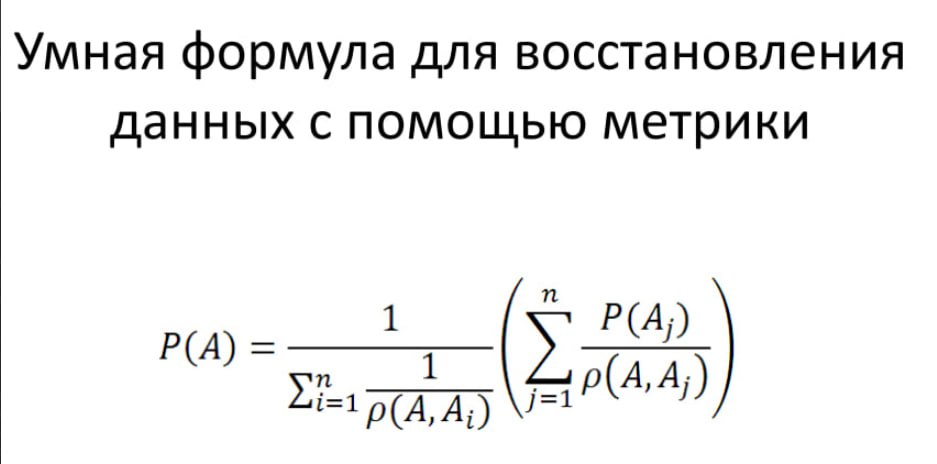

In [19]:
def manual_standardize(df, columns):
    df_standardized = df.copy()

    for col in columns:
        mean_val = df[col].mean()

        variance = ((df[col] - mean_val) ** 2).sum() / len(df[col])
        std_val = np.sqrt(variance)

        df_standardized[col] = (df[col] - mean_val) / std_val

        print(f"Стандартизация {col}: μ={mean_val:.2f}, σ={std_val:.2f}")

    return df_standardized

# Евклидова метрика расстояния
def manual_euclidean_distance(vec1, vec2):
    if len(vec1) != len(vec2):
        raise ValueError("Векторы должны быть одинаковой длины")

    sum_squared_diff = 0
    for i in range(len(vec1)):
        sum_squared_diff += (vec1[i] - vec2[i]) ** 2

    distance = np.sqrt(sum_squared_diff)

    return distance

# Функция для поиска k ближайших соседей
def find_k_nearest_neighbors(target_point, reference_points, reference_indices, k=1):
    """
    Находит k ближайших соседей для целевой точки

    Parameters:
    target_point - целевая точка (вектор признаков)
    reference_points - DataFrame с точками для сравнения
    reference_indices - индексы reference_points в исходном DataFrame
    k - количество ближайших соседей
    """
    distances = []

    for idx, (point_idx, point) in enumerate(reference_points.iterrows()):
        distance = manual_euclidean_distance(target_point, point.values)
        distances.append((distance, reference_indices[idx]))

    # Сортировка по расстоянию и выбор k ближайших
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]

    return nearest_neighbors

Вынес метод ближайших соседей в отдельную функцию, так как предполагаю, что она пригодится мне в ближайшем будущем.

In [23]:
def manual_nearest_neighbor_outlier_replacement(data, target_columns, feature_columns=None, k_neighbors=1):
    """
    Замена выбросов методом ближайшего соседа
    """
    data_processed = data.copy()

    # Если не указаны фичи, используем все числовые колонки кроме целевых
    if feature_columns is None:
        all_numeric = data.select_dtypes(include=[np.number]).columns.tolist()
        feature_columns = [col for col in all_numeric if col not in target_columns]

    print(f"Используемые признаки для расчета близости: {feature_columns}")

    print("Стандартизация признаков...")
    data_standardized = manual_standardize(data_processed, feature_columns)

    for target_col in target_columns:
        print(f"\n--- Обработка выбросов в колонке: {target_col} ---")

        normal_values, outliers, lower_bound, upper_bound = iqr(data_processed[target_col])

        outlier_indices = outliers.index.tolist()
        normal_indices = normal_values.index.tolist()

        print(f"Найдено выбросов: {len(outlier_indices)}")
        print(f"Нормальных наблюдений: {len(normal_indices)}")

        if len(normal_indices) == 0:
            print("Нет нормальных наблюдений для замены!")
            continue

        # Стандартизированные фичи только для нормальных наблюдений
        normal_features_standardized = data_standardized.loc[normal_indices, feature_columns]

        replacement_count = 0
        for outlier_idx in outlier_indices:
            outlier_features = data_standardized.loc[outlier_idx, feature_columns].values

            # Находим соседей
            nearest_neighbors = find_k_nearest_neighbors(
                outlier_features,
                normal_features_standardized,
                normal_indices,
                k=k_neighbors
            )

            # Получаем индексы ближайших соседей
            neighbor_indices = [neighbor[1] for neighbor in nearest_neighbors]

            # Вычисляем среднее значение целевой переменной у соседей
            neighbor_values = data_processed.loc[neighbor_indices, target_col]
            replacement_value = neighbor_values.mean()

            # Заменяем выброс
            original_value = data_processed.loc[outlier_idx, target_col]
            data_processed.loc[outlier_idx, target_col] = replacement_value

            replacement_count += 1

        print(f"Всего заменено выбросов в {target_col}: {replacement_count}")

    return data_processed

Заполнение выбросов методом ближайшего соседа:

In [24]:
# В качестве примера оставляю фичи, которые могли бы быть значимыми для определения пропусков, но
# все равно буду использовать все признаки.
feature_cols = ['MSSubClass', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

data_manual_nn = manual_nearest_neighbor_outlier_replacement(
    data=data,
    target_columns=['LotFrontage', 'LotArea'],
    # feature_columns=feature_cols,
    k_neighbors=1
)

Используемые признаки для расчета близости: ['Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Стандартизация признаков...
Стандартизация Id: μ=730.50, σ=421.47
Стандартизация MSSubClass: μ=56.90, σ=42.29
Стандартизация OverallQual: μ=6.10, σ=1.38
Стандартизация OverallCond: μ=5.58, σ=1.11
Стандартизация YearBuilt: μ=1971.27, σ=30.19
Стандартизация YearRemodAdd: μ=1984.87, σ=20.64
Стандартизация MasVnrArea: μ=103.69, σ=180.51
Стандартизация BsmtFinSF1: μ=443.64, σ=455.94
Стандартизация BsmtFinSF2: μ=46.55, σ=161.26
Стандартизация BsmtUnfSF: μ=567.24, 

Сразу визуализируем данные. Потом выведем описание.

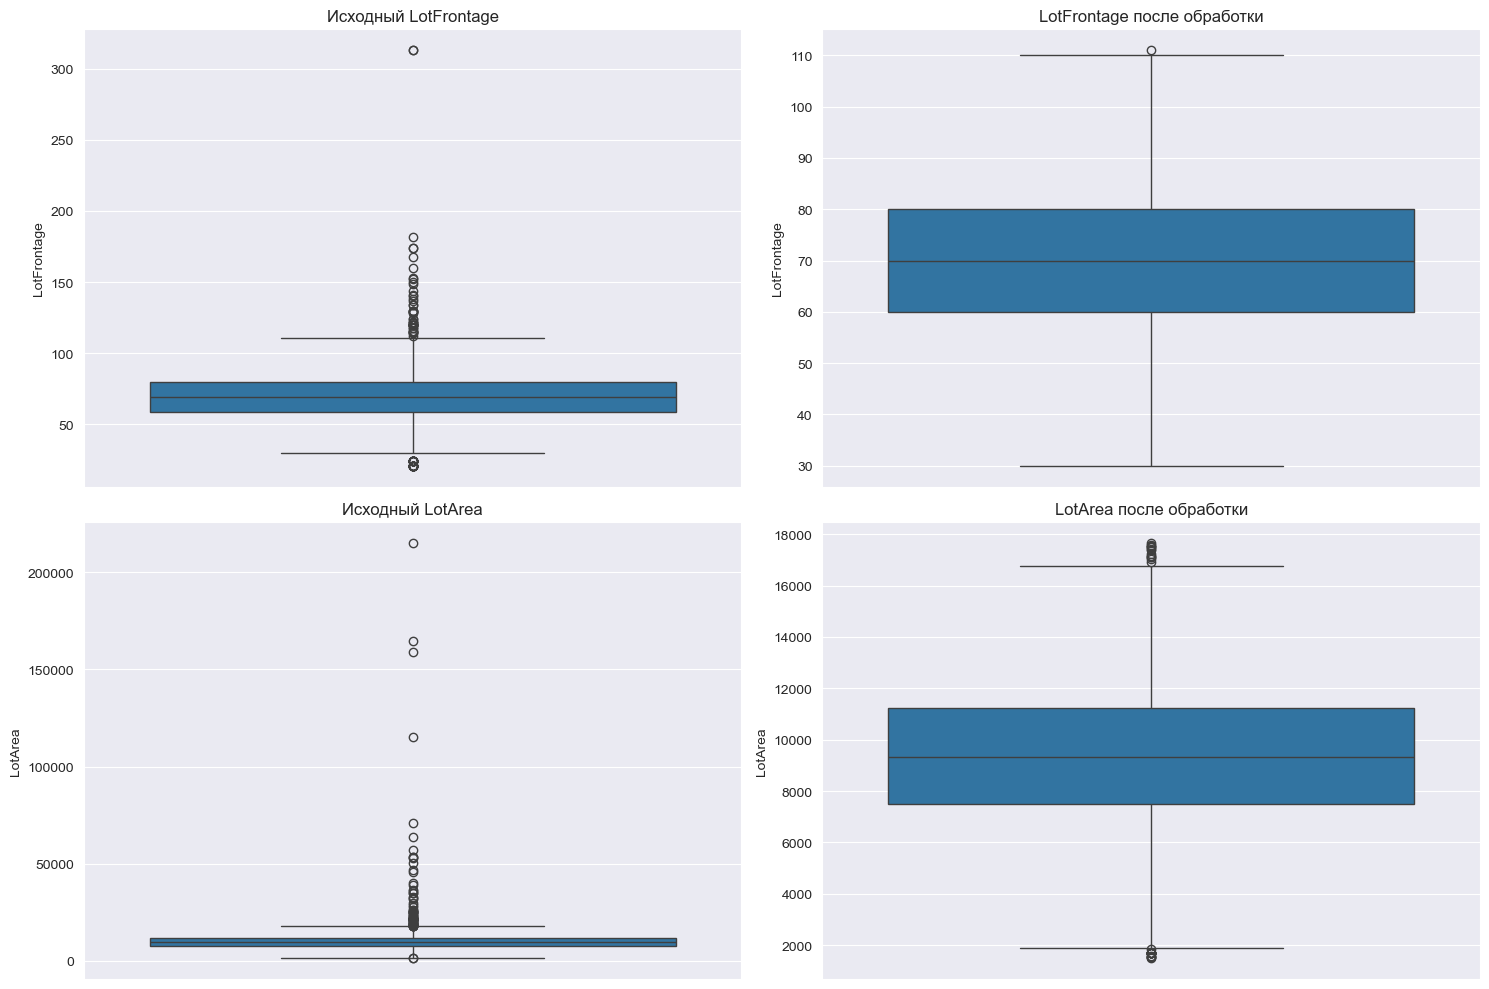

In [25]:
# Визуализируем результаты
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Исходные данные
sns.boxplot(y=data['LotFrontage'], ax=axes[0, 0])
axes[0, 0].set_title('Исходный LotFrontage')

sns.boxplot(y=data_manual_nn['LotFrontage'], ax=axes[0, 1])
axes[0, 1].set_title('LotFrontage после обработки')

sns.boxplot(y=data['LotArea'], ax=axes[1, 0])
axes[1, 0].set_title('Исходный LotArea')

sns.boxplot(y=data_manual_nn['LotArea'], ax=axes[1, 1])
axes[1, 1].set_title('LotArea после обработки')

plt.tight_layout()
plt.show()

Сравнение результатов:

In [31]:
data[['LotFrontage', 'LotArea']].describe()

,LotFrontage,LotArea
count,1201.000000,1460.000000
mean,70.049958,10516.828082
std,24.284752,9981.264932
min,21.000000,1300.000000
25%,59.000000,7553.500000
50%,69.000000,9478.500000
75%,80.000000,11601.500000
max,313.000000,215245.000000


In [32]:
data_manual_nn[['LotFrontage', 'LotArea']].describe()

,LotFrontage,LotArea
count,1201.000000,1460.000000
mean,69.083264,9311.645205
std,16.675873,3183.963195
min,30.000000,1491.000000
25%,60.000000,7500.000000
50%,70.000000,9318.500000
75%,80.000000,11250.000000
max,111.000000,17671.000000


Как мы можем заметить, ситуация с данными нормализовалась. Ящики с усами демонстрируют, что все еще остались выбросы, но это крайне незначительные и, я бы даже сказал, значимые для анализа данные, которые не нужно убирать.

### Практика по лекции

Будем сокращать количество значимых признаков по r2 критерию, используя жадный алгоритм в процессе оптимизации Линейной регрессии

Импорт необходимых ресурсов

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [36]:
# Подготовка данных
def prepare_data(data, target='SalePrice'):
    df = data.copy()

    # Заполняем пропуски
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

    # One-hot encoding для категориальных переменных
    categorical_cols = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    X = df.drop(columns=[target])
    y = df[target]
    return X, y

# Жадный отбор признаков (Forward Selection)
def greedy_forward_selection(X, y, max_features=15):
    selected_features = []
    available_features = list(X.columns)
    best_scores = []

    print("Жадный отбор признаков:")
    print("-" * 40)

    for i in range(min(max_features, len(available_features))):
        best_score = -np.inf
        best_feature = None

        for feature in available_features:
            # Пробуем добавить признак
            candidate_features = selected_features + [feature]
            X_subset = X[candidate_features]

            # Обучаем и оцениваем модель
            X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
            model = LinearRegression().fit(X_train, y_train)
            score = r2_score(y_test, model.predict(X_test))

            if score > best_score:
                best_score = score
                best_feature = feature

        # Добавляем лучший признак
        selected_features.append(best_feature)
        available_features.remove(best_feature)
        best_scores.append(best_score)

        print(f"Шаг {i+1}: '{best_feature}' - R² = {best_score:.4f}")

        # Останавливаемся если качество ухудшается
        if i > 0 and best_score < best_scores[-2]:
            selected_features.pop()  # Удаляем последний признак
            break

    return selected_features, best_scores

# Сравнение моделей
def compare_models(X, y, selected_features):
    # Модель со всеми признаками
    X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model_full = LinearRegression().fit(X_train_full, y_train)
    score_full = r2_score(y_test, model_full.predict(X_test_full))

    # Модель с отобранными признаками
    X_sel = X[selected_features]
    X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42)
    model_sel = LinearRegression().fit(X_train_sel, y_train)
    score_sel = r2_score(y_test, model_sel.predict(X_test_sel))

    # Результаты
    results = pd.DataFrame({
        'Все признаки': [X.shape[1], score_full],
        'Отобранные признаки': [len(selected_features), score_sel]
    }, index=['Количество признаков', 'R² Score'])

    return results, model_sel

# Визуализация процесса отбора
def plot_selection_process(scores):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(scores) + 1), scores, 'bo-', linewidth=2)
    plt.xlabel('Количество признаков')
    plt.ylabel('R² Score')
    plt.title('Жадный отбор признаков - качество модели')
    plt.grid(True, alpha=0.3)

    best_idx = np.argmax(scores)
    plt.axvline(x=best_idx + 1, color='red', linestyle='--', alpha=0.7)
    plt.annotate(f'Лучший результат\n{best_idx + 1} признаков\nR² = {scores[best_idx]:.4f}',
                xy=(best_idx + 1, scores[best_idx]),
                xytext=(best_idx + 3, scores[best_idx] - 0.1),
                arrowprops=dict(arrowstyle='->', color='red'))

    plt.tight_layout()
    plt.show()

Подготовка данных...
Данные подготовлены: 245 признаков
Жадный отбор признаков:
----------------------------------------
Шаг 1: 'OverallQual' - R² = 0.6505
Шаг 2: 'GrLivArea' - R² = 0.7458
Шаг 3: 'TotalBsmtSF' - R² = 0.7826
Шаг 4: 'BsmtExposure_Gd' - R² = 0.8007
Шаг 5: 'Neighborhood_NridgHt' - R² = 0.8128
Шаг 6: 'Neighborhood_NoRidge' - R² = 0.8260
Шаг 7: 'SaleType_New' - R² = 0.8360
Шаг 8: 'BsmtFinSF1' - R² = 0.8445
Шаг 9: 'RoofMatl_WdShngl' - R² = 0.8529
Шаг 10: 'LotArea' - R² = 0.8615
Шаг 11: 'Neighborhood_StoneBr' - R² = 0.8675
Шаг 12: 'Condition1_Norm' - R² = 0.8726
Шаг 13: 'HeatingQC_TA' - R² = 0.8771
Шаг 14: 'MasVnrArea' - R² = 0.8802
Шаг 15: 'OverallCond' - R² = 0.8838


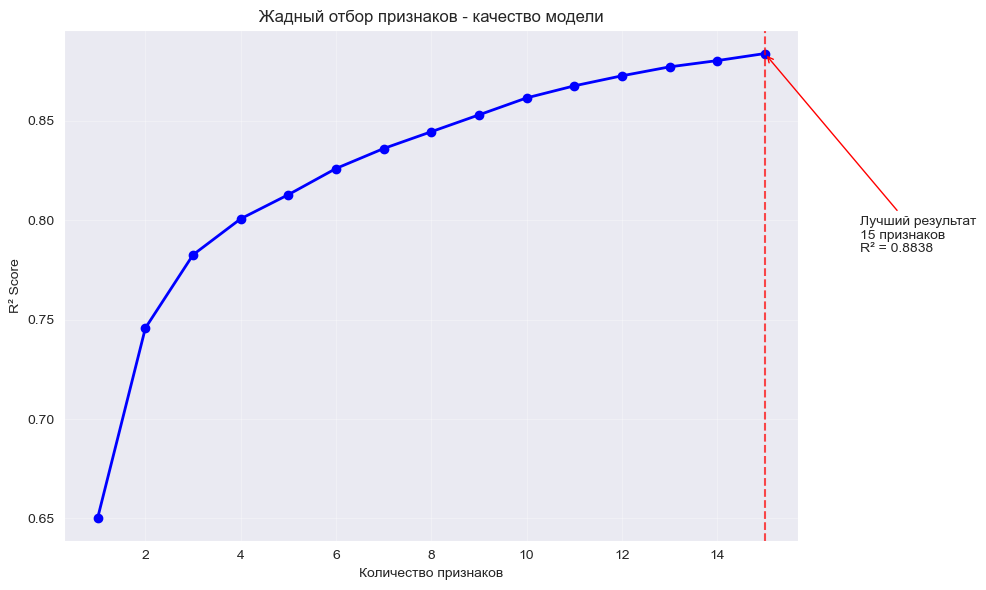


Сравнение моделей:
                      Все признаки  Отобранные признаки
Количество признаков    245.000000             15.00000
R² Score                  0.710839              0.88378

Лучшие признаки (15):
1. OverallQual
2. GrLivArea
3. TotalBsmtSF
4. BsmtExposure_Gd
5. Neighborhood_NridgHt
6. Neighborhood_NoRidge
7. SaleType_New
8. BsmtFinSF1
9. RoofMatl_WdShngl
10. LotArea
11. Neighborhood_StoneBr
12. Condition1_Norm
13. HeatingQC_TA
14. MasVnrArea
15. OverallCond

Топ-5 самых важных признаков:
                 feature   coefficient
8       RoofMatl_WdShngl  61751.298198
10  Neighborhood_StoneBr  53537.386948
5   Neighborhood_NoRidge  47388.506670
4   Neighborhood_NridgHt  44516.019390
6           SaleType_New  28101.138334
LinearRegression() ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtExposure_Gd', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'SaleType_New', 'BsmtFinSF1', 'RoofMatl_WdShngl', 'LotArea', 'Neighborhood_StoneBr', 'Condition1_Norm', 'HeatingQC_TA', 'MasVnrAr

In [37]:

try:
    df = data_manual_nn
except:
    from datasets import load_dataset
    house_price_dataset = load_dataset("animonte/train_house_price")
    df = house_price_dataset['train'].to_pandas()

print("Подготовка данных...")
X, y = prepare_data(df)
print(f"Данные подготовлены: {X.shape[1]} признаков")

# Жадный отбор признаков
selected_features, scores = greedy_forward_selection(X, y, max_features=15)

# Визуализация
plot_selection_process(scores)

# Сравнение моделей
results, best_model = compare_models(X, y, selected_features)

print("\nСравнение моделей:")
print(results)

print(f"\nЛучшие признаки ({len(selected_features)}):")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Важность признаков
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'coefficient': abs(best_model.coef_)
}).sort_values('coefficient', ascending=False)

print("\nТоп-5 самых важных признаков:")
print(feature_importance.head())

# print(best_model, selected_features, results)
